## Exercise notebook for the first session (60 min)

The exercise notebook involves new concepts not covered in the guided session. You are encouraged to work in groups of 2-4 if that helps you to speed things up. Please ask for help from the instructor and TAs. The session is time-bound, so make sure you are not stuck at a problem for too long before asking for help.  

First we import the relevant python modules:

In [1]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The module re is for regular expressions
import re

In this exercise session, we will explore the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic).

In [2]:
# Uncomment the below two lines only if using Google Colab
# from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Exploring the dataset (25 min)

Use `describe` function for numerical features (columns) to get a brief overview of the statistics of the data.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do the same as above for qualitative (non-numerical) features. Hint: Use `include='O'` parameter in the `describe` function.

In [4]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mitchell, Mr. Henry Michael",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Use the functions `isnull()` and `sum()` on the dataframe to find out the number of missing values in each column.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Some questions to consider:
1. Suppose the final goal is to design a model to predict whether a passenger survives or not, which of these features(columns) seems like important predictors? How can you analyse the data in view of this objective?
2. What are the possible ways to understand the correlation of features with survival? Does correlation always implies causation? 

Detecting missing values is an important first step in Feature Engineering, that is preparing the features (independent variables) to use for building the machine learning models. The next step is to handle those missing values. Depending on the data, sometimes it is a good idea to drop the rows or columns that have some or a lot of missing values, but that also means discarding relevant information. Another way to handle missing values is to fill them with something appropriate. 

3. Discuss the pros and cons of dropping the rows and/or columns with missing values in general. Should you drop none, all or some of the columns for this particular dataset in view of building the predictive model? Same question for dropping the rows with missing values.
3. If you consider filling the missing values, what are the possible options? Can you make use of other values in that column to fill the missing values? Can you make use of other values in that row as well as values in that column to fill the missing values 
4. Can the title in the name column be used for guessing a passengers' age based on the age values of other passengers with the same title?

Make the `PassengerId` column the index of the Data Frame. Hint: Use `set_index()`.

In [7]:
df = df.set_index('PassengerId')
# Another option
# df.set_index('PassengerId', inplace=True)

Check again whether the index has been changed in the original dataframe. 

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If not, there are two options to fix this. One is to set `inplace` parameter in the `set_index()` function as `True` and another is to use assignment operator `=` as in `df = df.function()`. 

***Question***: Why is the `inplace` keyword False by default? This is true not just for `set_index()` but for most built-in functions in pandas. 

Answer: To facilitate method chaining or piping i.e. invoking multiple operations one after the other. For example, `df.isnull().sum()` used above. Chaining is more commonly used in pandas as compared to another programming style i.e. using nested function calls. Please read more [here](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69), if interested.

 Use the built-in pandas function to count the number of surviving and non-surviving passengers. Hint: Use `value_counts()` on the column `df['Survived']`.

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Below is a pie chart of the same using `matplotlib`:

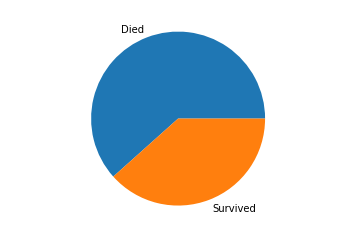

In [10]:
plt.axis('equal')
plt.pie(df['Survived'].value_counts(), labels=('Died', "Survived"));

Below is a bar chart for the survival rate among male and female passengers using `seaborn`. Here is [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf).

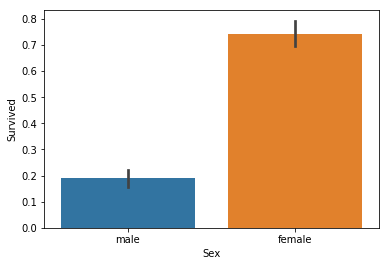

In [11]:
sns.barplot(x = 'Sex', y = 'Survived', data = df);

Plot the survival rate among passengers in each ticket class.

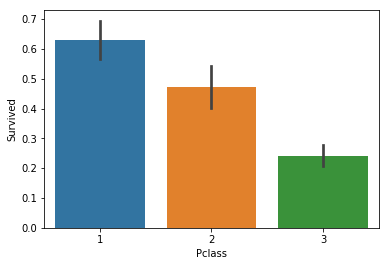

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df);

We can also check the survival rate among both genders within the three ticket classes as follows.

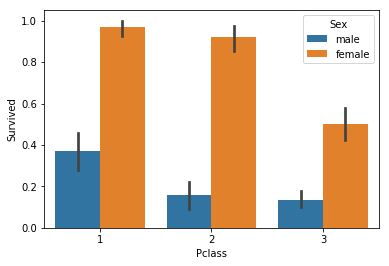

In [13]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

From the above chart, do you think that the gender affect the chance of survival for all the three ticket classes equally? Or does it seem like gender's effect is more pronounced for a certain ticket class passengers than others? We plot the  point estimates and confidence intervals for each sub-category to see it more clearly.

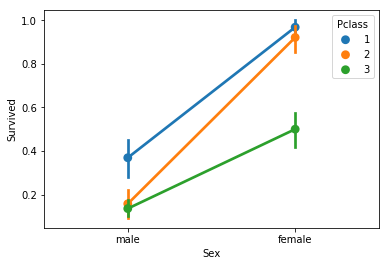

In [14]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=df);

Notice the steeper slope for the second class.

It seems that gender and ticket class put together give more information about the survival chance than both of them separately. Please feel free to later explore other variables and combination of variables in depth in your own time.

How many children were on board?

In [17]:
df[df['Age']<18].shape[0]

113

How many of the children on board survived?

In [18]:
df[(df['Age']<18) & (df['Survived']==1)].shape[0]

61

What is the most common port of embarkment? Hint: Check the frequency (counts) of each value in the Embarked column using an built-in function. 

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As we saw earlier, there are missing values in the column for Embarked. Fill them with the most commonly occuring value. Hint: Use `fillna()`.

In [20]:
df['Embarked'] = df['Embarked'].fillna('S')
# Another optiom
# df['Embarked'].fillna('S', inplace=True)

We should remove the *Cabin* column from the DataFrame-- too many values are missing. Hint: Use `drop()` with appropriate value for the `axis` keyword. 

In [21]:
df = df.drop('Cabin', axis=1)
# Another option
# df.drop('Cabin', axis=1, inplace=True)

Let us check whether the column is indeed dropped. If not, modify the code above accordingly.

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We check again to see the missing values in the DataFrame. 

In [23]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### 2. Feature Engineering: Creating a new column for the titles of the passengers (20 min)

Now, we are going to create a new feature (column) for titles of the passengers. For that, let us first take at the passengers' names. 

In [24]:
df.loc[:20, 'Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima'], dtype=object)

We notice one of the identifying characteristics of the titles above are that they end with a period. Regular expressions are very useful in the process of data extraction and we will use them using the python module `re` to extract the titles from the *Name* column. We will use regular expressions characters to construct a pattern and then use built-in function `findall` for pattern matching.

Some useful regular expression characters:
- `\w`: pattern must contain a word character, such as letters.
- `[ ]`: pattern must contain one of the characters inside the square brackets. If there is only one character inside the square brackets, for example `[.]`, then the pattern must contain it.

Let's try this.

In [25]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')

['Mr.']

It worked! let us try it on another name:

In [26]:
re.findall("\w\w[.]", 'Heikkinen, Miss. Laina')[0]

'ss.'

So, we want a pattern that automatically detects the length of the title and returns the entire title.

For regular expressions, \+ is added to a character/pattern to denote it is present one or more times. For example, `\w+` is used to denote one or more word characters. Fill in the regular expression in the below cell that will detect a period preceeded by one or more word characters.

In [27]:
# Fill in below:
re.findall("\w+[.]", 'Heikkinen, Miss. Laina')[0]

'Miss.'

The output should be `'Miss.'`

Summary: For pattern matching the titles using regular expressions:
- First we make sure it contains a period by using `[.]`. 
- Secondly, the period must be preceeded by word characters (one or more), so we use `\w+[.]`.

Write a function `get_title` that takes a name, extracts the title from it and returns the title. 

In [30]:
def get_title(name):
    title = re.findall("\w+[.]", name)[0]
    return title

Check that the function is working properly by running the following two cells.

In [31]:
get_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

'Mrs.'

The output should be `'Mrs.'`. Note: Make sure that the funtion returns a string and not a list. Please modify the above function accordingly.

In [32]:
get_title('Simonius-Blumer, Col. Oberst Alfons')

'Col.'

The output should be `'Col.'`.

Create a new column named Title and extract titles from the Name column using the above function `get_title`. Hint: Use built-in `map()` function. The syntax is `df['New_column'] = df['Relevant_column'].map(function_name)`.

In [33]:
df['Title'] = df['Name'].map(get_title)

In [34]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


List all the unique values for the titles along with their frequency. Hint: Use an inbuilt pandas function

In [35]:
df['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Ms.            1
Don.           1
Countess.      1
Sir.           1
Mme.           1
Jonkheer.      1
Lady.          1
Capt.          1
Name: Title, dtype: int64

Now, we want to replace the various spellings of the same title to a single one. Hint: Use the below dictionary with the `replace` function

`title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'}`

In [36]:
title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'} 

df['Title'] = df['Title'].replace(title_dictionary)
# Another option
# df['Title'].replace(title_dictionary, inplace=True)

List all the unique values for the titles along with their frequency to check that the titles are replaced properly.

In [37]:
df['Title'].value_counts()

Mr.        518
Miss.      185
Mrs.       125
Master.     40
Rare        23
Name: Title, dtype: int64

### 3. More Feature Engineering: Working on the Age column  (10 min)

What is the age of the oldest person on board? 

In [38]:
df['Age'].max()

80.0

Find all the passenger information for the oldest person on board. Hint: Use `loc[]` method with `idxmax()` for the Age column.

In [45]:
df.loc[df['Age'].idxmax()]

Survived                                       1
Pclass                                         1
Name        Barkworth, Mr. Algernon Henry Wilson
Sex                                         male
Age                                           80
SibSp                                          0
Parch                                          0
Ticket                                     27042
Fare                                          30
Embarked                                       S
Title                                        Mr.
Name: 631, dtype: object

What is the average age of the passengers?

In [46]:
df['Age'].mean()

29.69911764705882

What is the median age of the passengers?

In [47]:
df['Age'].median()

28.0

Discuss with your team to come up with a single best approximation to fill in the missing values for the Age column and then write the code to fill them. Hint: Use `fillna`.

In [48]:
# We first make a copy of the dataframe in case we want 
# to use it later before we fill in missing values
df2 = df.copy() 

df['Age'] = df['Age'].fillna(28)
# Another option
df['Age'].fillna(28, inplace=True)

Note: In the next session, we will create a title column and use it to group the passengers into different title-based groups and make use of the groupings to fill the missing age values. 

What is the median age of passengers with the title 'Miss.'? Hint: Use `loc[]` method for slicing off the select rows and the *Age* column.

In [49]:
df.loc[df['Title']=='Miss.', 'Age'].median()

24.0

What is the median age of passengers with the title 'Mrs.'?

In [50]:
df.loc[df['Title']=='Mrs.', 'Age'].median()

33.0

Is there a noticeble difference in the median ages for the passengers with the above two titles? Should we take titles into account while filling the missing values for the *Age* column? If yes, how?

***Optional (preferably come back to this at the end)***:
1. Find the list of indices of the missing values for the age column using the dateframe `df2`.
2. Group the passengers with respect to their titles using `groupby("Title")` and then get the median age of passengers in each group using `transform("median")` on the *Age* column.
3. Create a new column *MedianAge* which consists of the groupwise median age depending on the passengers' title.
4. Next use this column to fill in the missing values for the age column using `fillna`.
5. Finally compare the age column for `df` and `df2` for the list of indices from the first step.

### 4. Correlation between variables (5 min)

Pearson correlation coefficients measures the linear correlation between the variables.

$$\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X, \sigma_Y}$$
where 
- $cov(X, Y)$ is the covariance.    
- $\sigma_X, \sigma_Y$ are standard deviations of $X$ and $Y$ respectively.

The correlation between two variables ranges from -1 to 1. The closer in absolute value a correlation is to 1, the more dependent two features are on each other. 

Get the correlation matrix for the variables (columns) in the dataset. Hint: Use a built-in function.

In [51]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


* From the above matrix, note which feature has the highest correlation with the survival. 
* Do features have high correlation among themselves? 
* Note that this matrix has excluded some categorical variables like gender, port of embarkment, etc. 

The correlation matrix can also be visualized using heatmaps as shown below.

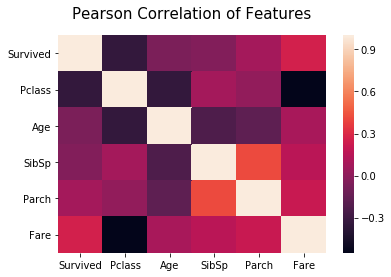

In [52]:
correlation_matrix = df.corr();
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

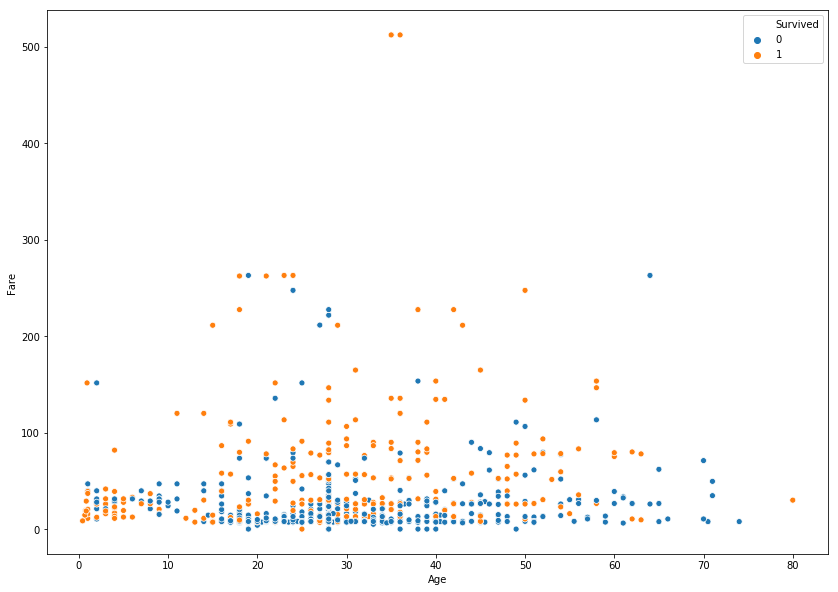

In [53]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df);

To build a prediction model to classify the passengers is same as drawing a clear boundary separating the orange and blue points. The task seems non-trivial by using only the two numerical features *Age* and *Fare*. In the later sessions, we will build models using other features as well that would classify points with the accuracy of around 80%.

#### Topics covered in today's session:
- Reading csv files using `read_csv()`
- Slicing and indexing dataframes using conditionals as well as `iloc[]` and `loc[]` methods
- Statistical summary and exploration using `describe()`, `median()`, `mean()`, `idxmax()`, `corr()`, etc.
- Detecting and filling missing values in the dataset using `isnull()` and `fillna()`
- Dropping columns using `drop()`
- Basic operations such as `set_index()`, `replace()`, `value_counts()`, `columns`, `index`, etc.
- Regular expressions for data extraction
- Feature engineering such as creating a new feature for titles
- Some basic plots
- Correlation among features

#### Acknowledgment:
* [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) dataset openly available in Kaggle is used in the exercises.
